In [1]:
import pandas as pd
import numpy as np
import ast


pd.set_option("display.max_columns", None)
# Load the data
df = pd.read_csv("../../data/final_data_complete.csv")
df.head()

,WikiID,FreebaseID,Name,ReleaseDate,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,merge_year,nrclex_emotions,roberta_emotions,distilbert_emotions,CharacterName,ActorAge,ActorGender,ActorBirthDate,ActorGenderFlag,merge_title,movieId,title,mean_ratings,std_dev_ratings,count_ratings
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...","Set in the second half of the 22nd century, th...",2001.0,"{'fear': 0.16296296296296298, 'anger': 0.13333...","{'neutral': 0.8483592867851257, 'realization':...","{'disgust': 0.5021221041679382, 'fear': 0.3510...","['Akooshay', 'Lieutenant Melanie Ballard', 'De...","[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, 37....","['F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', ...","[Timestamp('1958-08-26 00:00:00'), Timestamp('...","[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",ghosts of mars,4735.0,Ghosts of Mars (2001),2.427083,1.087064,144.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",['English Language'],['United States of America'],"['Mystery', 'Biographical film', 'Drama', 'Cri...",NaN,2000.0,NaN,NaN,NaN,"['Police Officer', 'Reporter', nan, nan, 'FBI ...","[37.78852253927453, 43.0, 37.78852253927453, 3...","['M', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F', ...","[NaT, Timestamp('1956-12-19 00:00:00'), NaT, N...","[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]",getting away with murder: the jonbenét ramsey ...,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",['Norwegian Language'],['Norway'],"['Crime Fiction', 'Drama']",NaN,1988.0,NaN,NaN,NaN,"[nan, nan, nan, nan]","[33.0, 28.0, 40.0, 30.0]","['M', 'F', 'M', 'F']","[Timestamp('1954-10-05 00:00:00'), Timestamp('...","[0, 1, 0, 1]",brun bitter,NaN,NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",['English Language'],['United Kingdom'],"['Thriller', 'Erotic thriller', 'Psychological...",A series of murders of rich young women throug...,1987.0,"{'fear': 0.1751412429378531, 'anger': 0.135593...","{'neutral': 0.925209254026413, 'approval': 0.0...","{'anger': 0.5024036765098572, 'disgust': 0.324...","[nan, nan]","[32.0, 26.0]","['M', 'F']","[Timestamp('1954-05-08 00:00:00'), Timestamp('...","[0, 1]",white of the eye,90015.0,White of the Eye (1987),2.250000,2.474874,2.0
4,261236,/m/01mrr1,A Woman in Flames,1983,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",['German Language'],['Germany'],['Drama'],"Eva, an upper class housewife, becomes frustra...",1983.0,"{'fear': 0.0673076923076923, 'anger': 0.105769...","{'neutral': 0.8632992506027222, 'approval': 0....","{'anger': 0.3256497378461063, 'disgust': 0.163...","[nan, nan, nan]","[32.0, 32.0, 35.0]","['F', 'M', 'M']","[Timestamp('1950-06-20 00:00:00'), Timestamp('...","[1, 0, 0]",a woman in flames,NaN,NaN,NaN,NaN,NaN


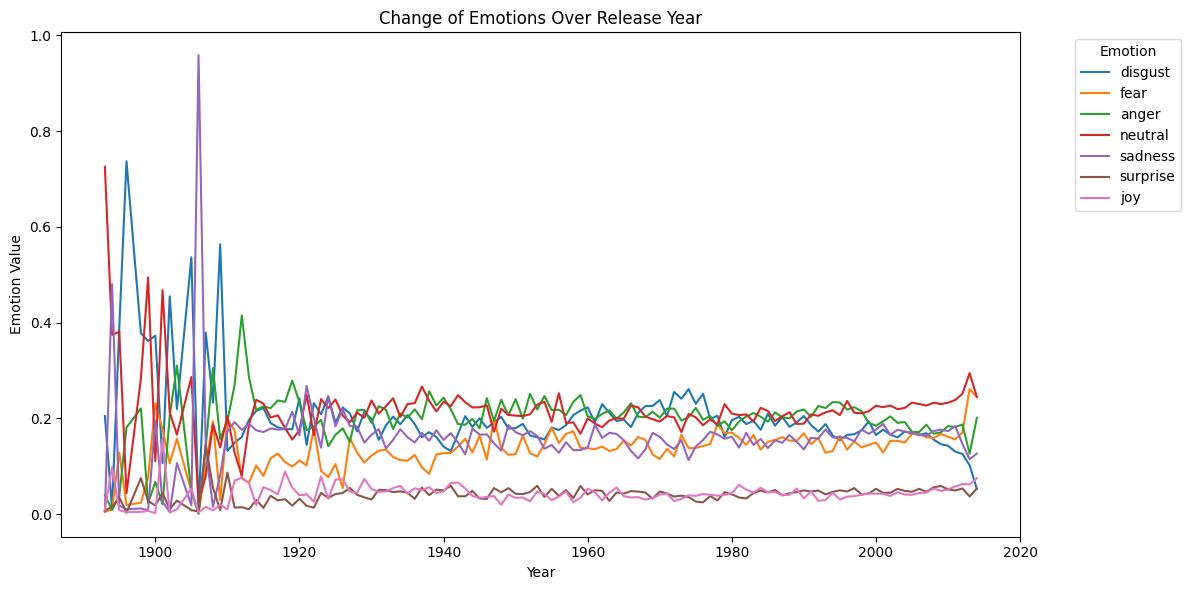

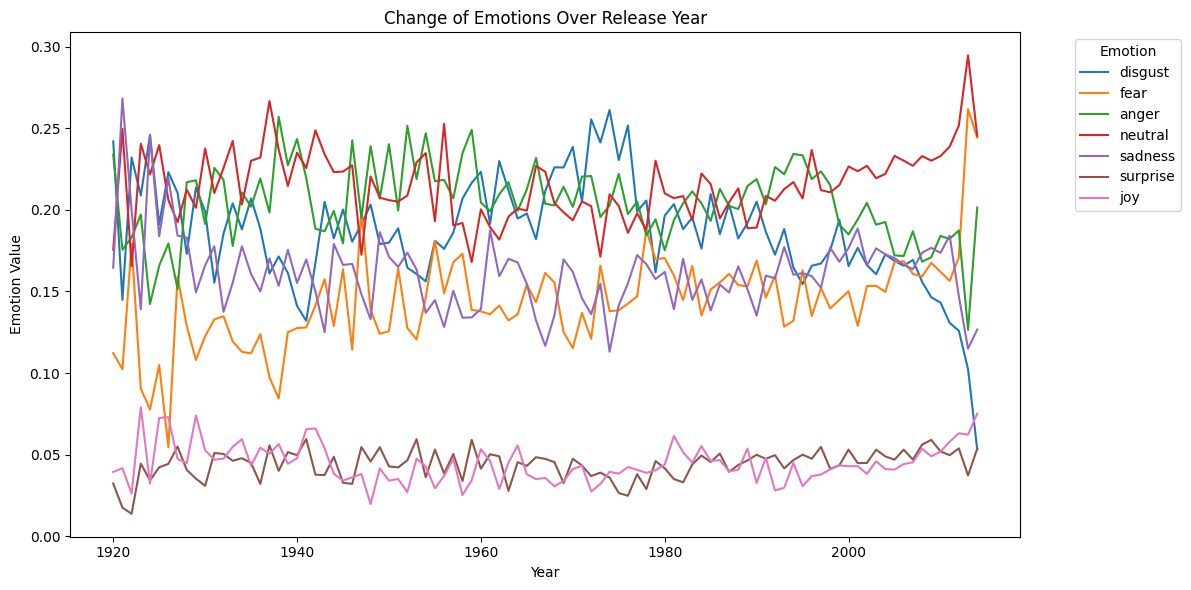

<Figure size 1000x600 with 0 Axes>

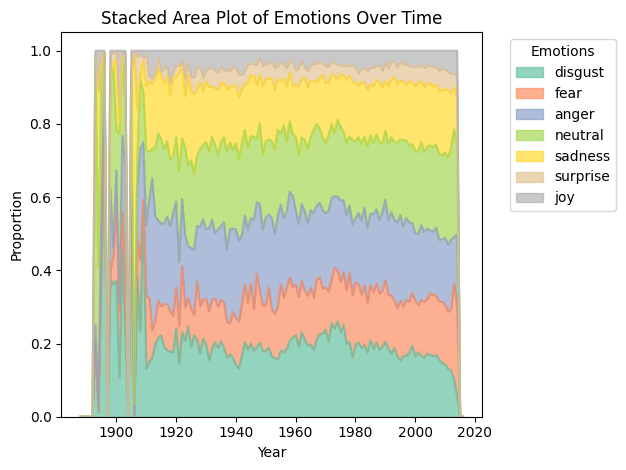

In [2]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../")
from utils.methods import conv_to_dict

temp = pd.DataFrame(list(df['distilbert_emotions'].apply(conv_to_dict)))

emotions_df = pd.concat([df, temp], axis=1)

emotions_df['merge_year'] = emotions_df['merge_year'].astype("Int64")


emotions = ['disgust', 'fear', 'anger', 'neutral', 'sadness', 'surprise', 'joy']

temp = emotions_df.groupby('merge_year').agg({
    emotion: ['mean'] for emotion in emotions
}).reset_index()


temp.columns = ['merge_year'] + emotions

long_df = pd.melt(temp, id_vars=["merge_year"], 
                  var_name="Emotion", 
                  value_name="Value")

plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df, x="merge_year", y="Value", hue="Emotion")
plt.title("Change of Emotions Over Release Year")
plt.xlabel("Year")
plt.ylabel("Emotion Value")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df[long_df['merge_year'] >= 1920], x="merge_year", y="Value", hue="Emotion")
plt.title("Change of Emotions Over Release Year")
plt.xlabel("Year")
plt.ylabel("Emotion Value")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

temp.set_index('merge_year', inplace=True)

# Plot the stacked area plot
plt.figure(figsize=(10, 6))
temp.plot.area(stacked=True, cmap='Set2', alpha=0.7)

# Customize the plot
plt.title('Stacked Area Plot of Emotions Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

####################################################
 Processing disgust...
ADF Statistic for disgust: -0.6049908457524176
p-value for disgust: 0.869850307593089
ADF Statistic after differencing for disgust: -17.678002477592273
p-value after differencing for disgust: 3.619127570863324e-30
Selected ARIMA parameters for disgust: p=1, d=1, q=1


<Figure size 1000x600 with 0 Axes>

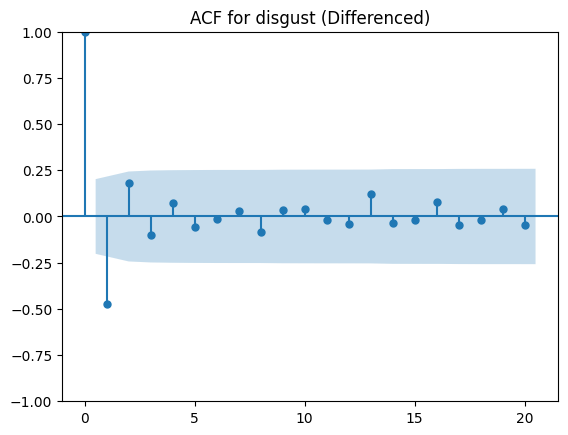

<Figure size 1000x600 with 0 Axes>

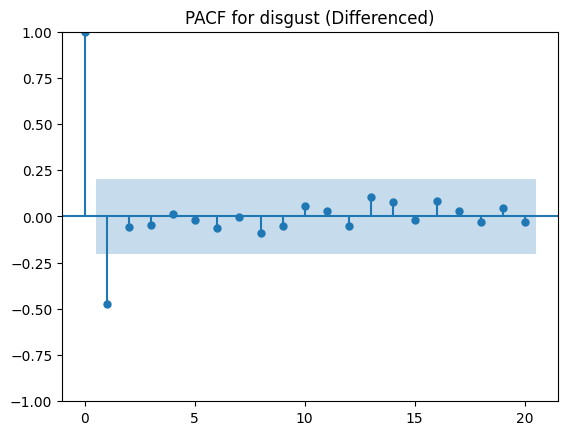

Summary for disgust ARIMA model:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   94
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 223.744
Date:                Thu, 05 Dec 2024   AIC                           -439.487
Time:                        11:08:17   BIC                           -429.314
Sample:                             0   HQIC                          -435.378
                                 - 94                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.002     -0.955      0.340      -0.004       0.002
ar.L1         -0.4928      0.149     -3.313      0.001      -0.784      -0.201
ma.L1         -0.10

<Figure size 1000x600 with 0 Axes>

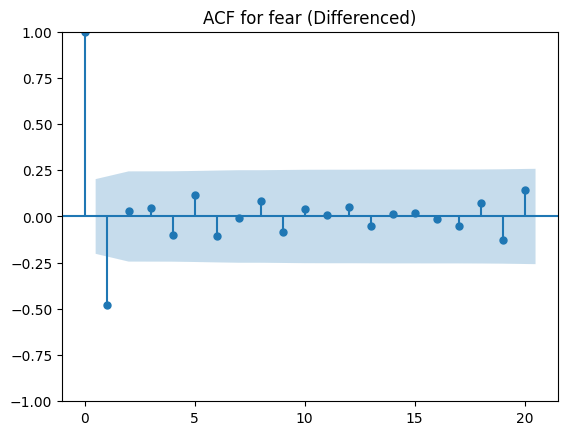

<Figure size 1000x600 with 0 Axes>

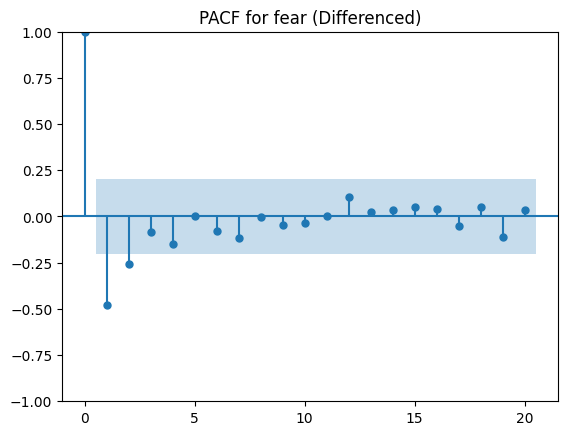

Summary for fear ARIMA model:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   94
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 218.316
Date:                Thu, 05 Dec 2024   AIC                           -426.633
Time:                        11:08:17   BIC                           -413.916
Sample:                             0   HQIC                          -421.496
                                 - 94                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      2.929      0.003       0.000       0.001
ar.L1          0.2294      0.086      2.677      0.007       0.061       0.397
ar.L2          0.1315 

/home/filo/anaconda3/envs/ADA_p/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 1000x600 with 0 Axes>

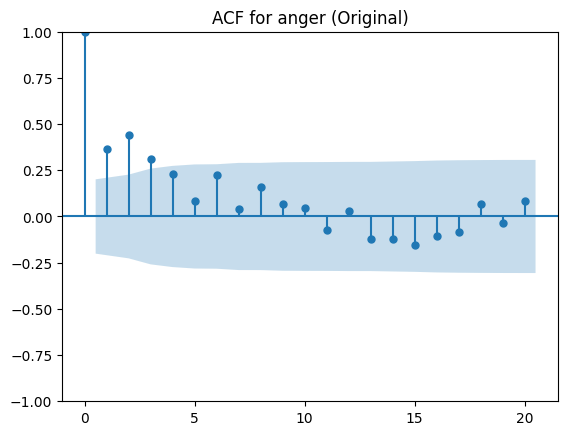

<Figure size 1000x600 with 0 Axes>

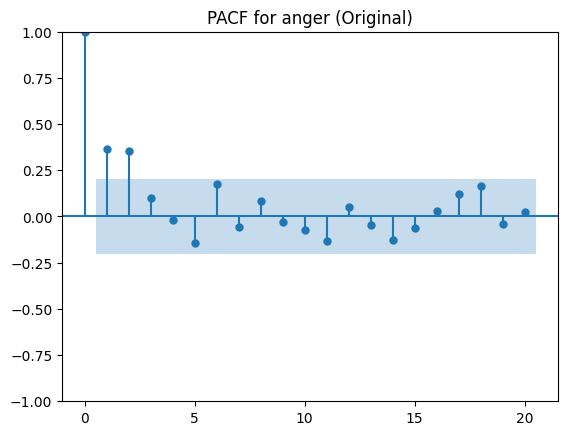

Summary for anger ARIMA model:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   95
Model:                ARIMA(18, 0, 6)   Log Likelihood                 247.730
Date:                Thu, 05 Dec 2024   AIC                           -443.460
Time:                        11:08:22   BIC                           -377.059
Sample:                             0   HQIC                          -416.629
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2040      0.008     26.264      0.000       0.189       0.219
ar.L1          0.1342      1.018      0.132      0.895      -1.861       2.130
ar.L2          0.2984

/home/filo/anaconda3/envs/ADA_p/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 1000x600 with 0 Axes>

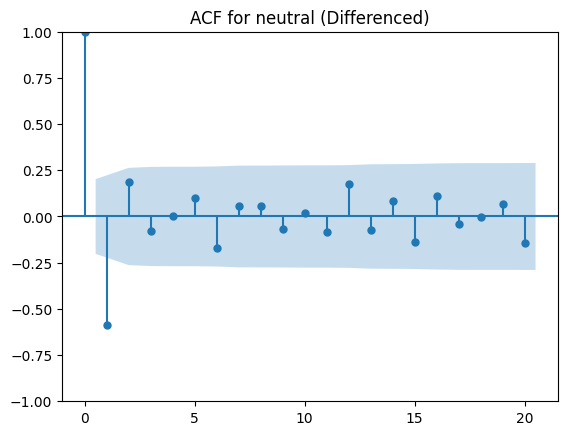

<Figure size 1000x600 with 0 Axes>

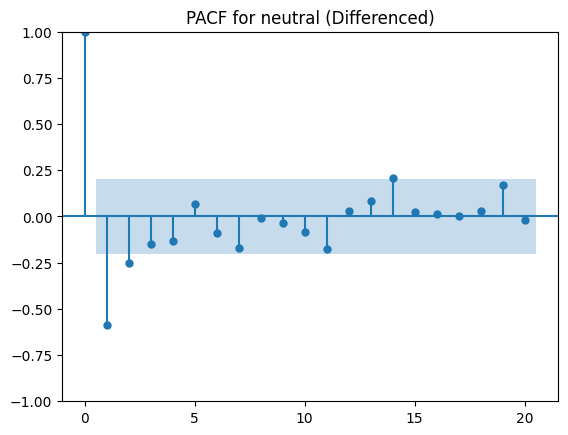

Summary for neutral ARIMA model:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   94
Model:                ARIMA(19, 0, 1)   Log Likelihood                 249.282
Date:                Thu, 05 Dec 2024   AIC                           -454.565
Time:                        11:08:26   BIC                           -398.612
Sample:                             0   HQIC                          -431.964
                                 - 94                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      0.727      0.467      -0.001       0.003
ar.L1         -0.4248      0.469     -0.906      0.365      -1.344       0.494
ar.L2         -0.01

/home/filo/anaconda3/envs/ADA_p/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 1000x600 with 0 Axes>

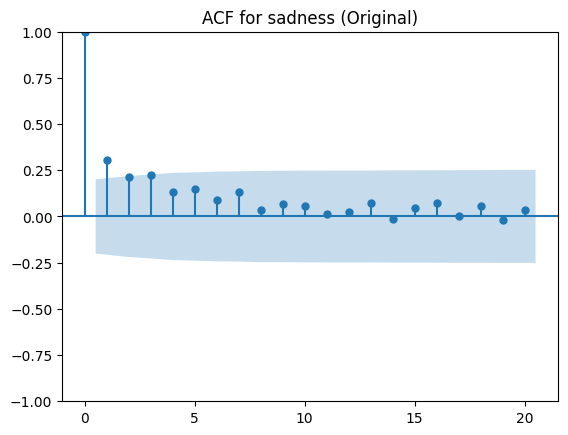

<Figure size 1000x600 with 0 Axes>

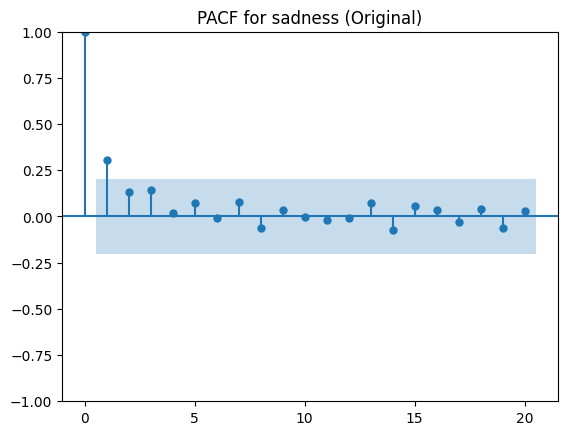

Summary for sadness ARIMA model:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   95
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 229.203
Date:                Thu, 05 Dec 2024   AIC                           -446.406
Time:                        11:08:26   BIC                           -431.083
Sample:                             0   HQIC                          -440.214
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1614      0.008     21.518      0.000       0.147       0.176
ar.L1          0.8636      0.147      5.890      0.000       0.576       1.151
ma.L1         -0.65

/home/filo/anaconda3/envs/ADA_p/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 1000x600 with 0 Axes>

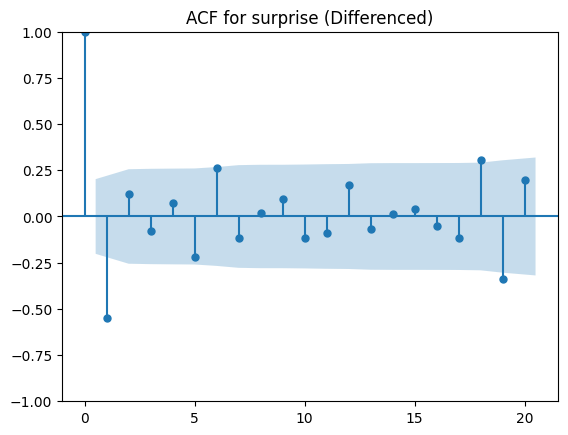

<Figure size 1000x600 with 0 Axes>

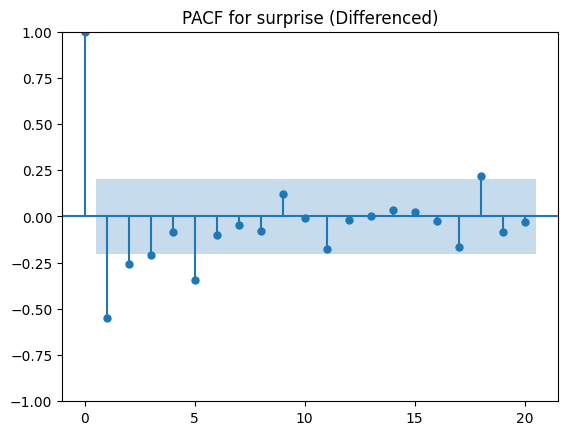

/home/filo/anaconda3/envs/ADA_p/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/filo/anaconda3/envs/ADA_p/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Summary for surprise ARIMA model:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   94
Model:               ARIMA(18, 0, 19)   Log Likelihood                 327.440
Date:                Thu, 05 Dec 2024   AIC                           -576.879
Time:                        11:08:34   BIC                           -477.691
Sample:                             0   HQIC                          -536.814
                                 - 94                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.722      0.470      -0.000       0.001
ar.L1         -0.4006      1.307     -0.307      0.759      -2.962       2.161
ar.L2         -0.1

/home/filo/anaconda3/envs/ADA_p/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 1000x600 with 0 Axes>

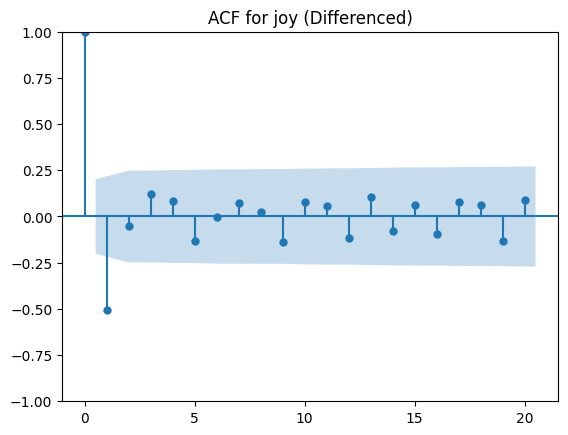

<Figure size 1000x600 with 0 Axes>

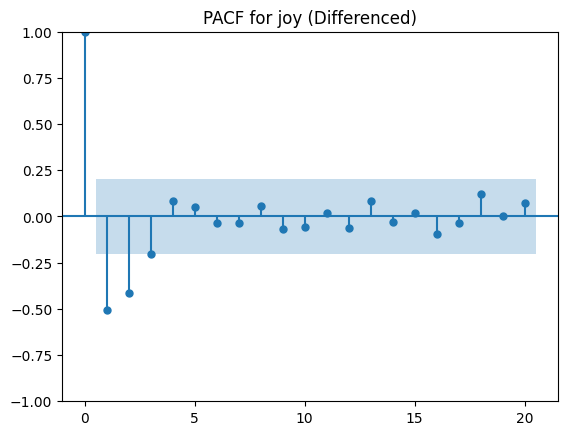

Summary for joy ARIMA model:
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   94
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 295.107
Date:                Thu, 05 Dec 2024   AIC                           -580.215
Time:                        11:08:34   BIC                           -567.498
Sample:                             0   HQIC                          -575.078
                                 - 94                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.612      0.541      -0.001       0.001
ar.L1         -0.4544      0.196     -2.324      0.020      -0.838      -0.071
ar.L2         -0.2869  

/home/filo/anaconda3/envs/ADA_p/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data_filtered = long_df[long_df['merge_year'] >= 1920]

def box_jenkins_procedure(emotion_name, data):
    emotion_data = data[data['Emotion'] == emotion_name]
    
    emotion_data = emotion_data.dropna(subset=['Value']).reset_index(drop=True)
    


    adf_result = adfuller(emotion_data['Value'])
    print(f"ADF Statistic for {emotion_name}: {adf_result[0]}")
    print(f"p-value for {emotion_name}: {adf_result[1]}")
    
    if adf_result[1] > 0.05:
        is_diff = True
        series_to_model = emotion_data['Value'].diff().dropna().reset_index(drop=True)
        adf_result_diff = adfuller(series_to_model)
        print(f"ADF Statistic after differencing for {emotion_name}: {adf_result_diff[0]}")
        print(f"p-value after differencing for {emotion_name}: {adf_result_diff[1]}")
    else:
        is_diff = False
        series_to_model = emotion_data['Value'].dropna().reset_index(drop=True)
    
    # Calculate ACF and PACF
    acf_vals = acf(series_to_model, nlags=20)
    pacf_vals = pacf(series_to_model, nlags=20, method="ols")
    
    # Determine significant spikes
    significance_level = 1.96 / (len(series_to_model) ** 0.5)
    p = max((i for i, x in enumerate(pacf_vals) if abs(x) > significance_level and i > 0), default=0)
    q = max((i for i, x in enumerate(acf_vals) if abs(x) > significance_level and i > 0), default=0)

    title_suffix = " (Differenced)" if is_diff else " (Original)"

    print(f"Selected ARIMA parameters for {emotion_name}: p={p}, d={'1' if is_diff else '0'}, q={q}")

    plt.figure(figsize=(10, 6))
    plot_acf(series_to_model, lags=20, title=f"ACF for {emotion_name}{title_suffix}")
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plot_pacf(series_to_model, lags=20, title=f"PACF for {emotion_name}{title_suffix}")
    plt.show()
    
    model = ARIMA(series_to_model, order=(p, 0, q))
    model_fit = model.fit()
    print(f"Summary for {emotion_name} ARIMA model:")
    print(model_fit.summary())
    return model_fit

# Apply the procedure to each emotion
box_jenkins_results = {}
for emotion in emotions:
    print("####################################################\n",f"Processing {emotion}...")
    box_jenkins_results[emotion] = box_jenkins_procedure(emotion, data_filtered)

In [ ]:
box_jenkins_results

{'disgust': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7575f8a37450>,
 'fear': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7575fd594510>,
 'anger': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7575f8be9790>,
 'neutral': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7575fd51fd50>,
 'sadness': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7575f8b9ce50>,
 'surprise': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7575f899c510>,
 'joy': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7575f89d5850>}